# Prelude
This is a recap of where we left off last lecture.

In [1]:
import pandas as pd

df = pd.read_csv("https://dlsun.github.io/pods/data/bordeaux.csv",
                 index_col="year")
df

price  summer  har   sep  win  age
year                                    
1952   37.0    17.1  160  14.3  600   40
1953   63.0    16.7   80  17.3  690   39
1955   45.0    17.1  130  16.8  502   37
1957   22.0    16.1  110  16.2  420   35
1958   18.0    16.4  187  19.1  582   34
1959   66.0    17.5  187  18.7  485   33
1960   14.0    16.4  290  15.8  763   32
1961  100.0    17.3   38  20.4  830   31
1962   33.0    16.3   52  17.2  697   30
1963   17.0    15.7  155  16.2  608   29
1964   31.0    17.3   96  18.8  402   28
1965   11.0    15.4  267  14.8  602   27
1966   47.0    16.5   86  18.4  819   26
1967   19.0    16.2  118  16.5  714   25
1968   11.0    16.2  292  16.4  610   24
1969   12.0    16.5  244  16.6  575   23
1970   40.0    16.7   89  18.0  622   22
1971   27.0    16.8  112  16.9  551   21
1972   10.0    15.0  158  14.6  536   20
1973   16.0    17.1  123  17.9  376   19
1974   11.0    16.3  184  16.2  574   18
1975   30.0    16.9  171  17.2  572   17
1976   25.0    17.6  247  16.1  418   16
1977   11.0    15.6   87  16.8  821   15
1978   27.0    15.8   51  17.4  763   14
1979   21.0    16.2  122  17.3  717   13
1980   14.0    16.0   74  18.4  578   12
1981    NaN    17.0  111  18.0  535   11
1982    NaN    17.4  162  18.5  712   10
1983    NaN    17.4  119  17.9  845    9
1984    NaN    16.5  119  16.0  591    8
1985    NaN    16.8   38  18.9  744    7
1986    NaN    16.3  171  17.5  563    6
1987    NaN    17.0  115  18.9  452    5
1988    NaN    17.1   59  16.8  808    4
1989    NaN    18.6   82  18.4  443    3
1990    NaN    18.7   80  19.3  468    2
1991    NaN    17.7  183  20.4  570    1

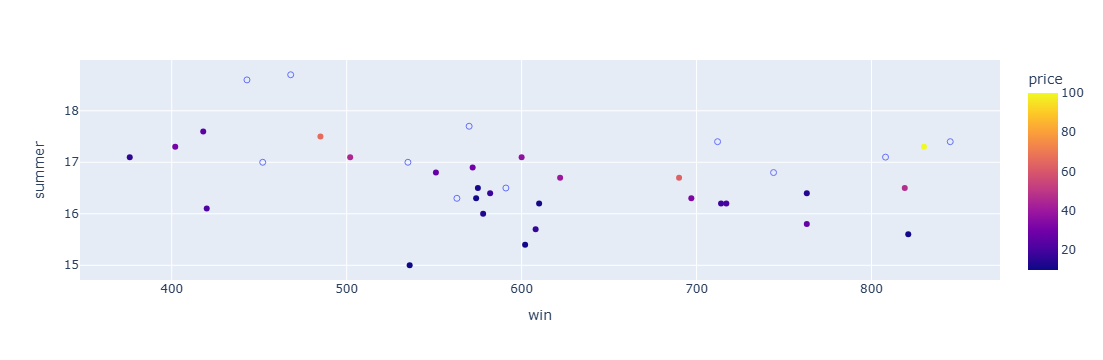

In [2]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.scatter(df[~df["price"].isnull()],
                  x="win", y="summer", color="price")
fig2 = px.scatter(df[df["price"].isnull()],
                  x="win", y="summer", symbol_sequence=["circle-open"])

go.Figure(data=fig1.data + fig2.data, layout=fig1.layout)

# K -Nearest Neighbors from Scratch

In [3]:
df_train = df.loc[:1980].copy()
df_test = df.loc[1981:].copy()

Scale the input variables.

In [4]:
X_train = df_train[["win", "summer"]]
y_train = df_train["price"]

# Standardize the features.
X_train_mean = X_train.mean()
X_train_sd = X_train.std()
X_train_scaled = (X_train - X_train_mean) / X_train_sd

In [5]:
X_test = df_test[["win", "summer"]]
X_test_scaled = (X_test - X_train_mean) / X_train_sd
X_test_scaled

win    summer
year                    
1981 -0.568896  0.812183
1982  0.802826  1.425581
1983  1.833554  1.425581
1984 -0.134905  0.045437
1985  1.050821  0.505485
1986 -0.351900 -0.261262
1987 -1.212132  0.812183
1988  1.546810  0.965533
1989 -1.281881  3.265772
1990 -1.088135  3.419122
1991 -0.297651  1.885629

Calculate distances and find the 5 closest training observations.

In [6]:
import numpy as np
dists = np.sqrt(
    ((X_test_scaled.loc[1986] - X_train_scaled) ** 2).sum(axis=1))
dists

year
1952    1.259860
1953    1.159726
1955    1.314727
1957    1.149883
1958    0.212597
1959    1.936933
1960    1.557535
1961    2.575503
1962    1.038478
1963    0.983970
1964    1.976971
1965    1.412851
1966    2.007525
1967    1.180230
1968    0.395207
1969    0.320488
1970    0.765065
1971    0.772366
1972    2.004492
1973    1.898753
1974    0.085248
1975    0.922736
1976    2.288442
1977    2.269387
1978    1.729248
1979    1.203287
1980    0.474508
dtype: float64

In [7]:
index_nearest = dists.sort_values().index[:5]
index_nearest

Index([1974, 1958, 1969, 1968, 1980], dtype='int64', name='year')

Finally, to make a prediction, we average the labels  y  of these "nearest" training observations.

In [8]:
y_train[index_nearest].mean()

np.float64(13.2)

We can do this for every vintage in the test data by writing a for loop.

In [9]:
def calculate_knn_prediction(test_obs_scaled):
  # TODO: determine the k-nearest neighbors to test_obs_scaled
  # TODO: calculate the mean label of the k-nearest neighbors
  pass

for year in range(1981, 1992):
  print(year, calculate_knn_prediction(X_test_scaled.loc[year]))

1981 None
1982 None
1983 None
1984 None
1985 None
1986 None
1987 None
1988 None
1989 None
1990 None
1991 None


If we want the predictions in a Pandas object, we can use the .apply() function.

In [10]:
X_test_scaled.apply(calculate_knn_prediction, axis="columns")


year
1981    None
1982    None
1983    None
1984    None
1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
dtype: object

# K -Nearest Neighbors in Scikit-Learn

Scikit-learn provides a built-in model KNeighborsRegressor that fits  k -nearest neighbors regression models.

But first, we need to scale the training and test data.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Scale the test data using the scaler that was fit to the training data!
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train_scaled, y=y_train)
model.predict(X=X_test_scaled)

array([35.8, 54. , 52.2, 18.4, 35.6, 13.2, 37. , 51.4, 36.6, 36.6, 40.6])

A Pipeline allows us to chain together preprocessing and modeling steps. They have .fit() and .predict() methods like any model.

In [13]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=5))
pipeline.fit(X=X_train, y=y_train)
pipeline.predict(X=X_test)

array([35.8, 54. , 52.2, 18.4, 35.6, 13.2, 37. , 51.4, 36.6, 36.6, 40.6])